# Introduction

<br>

The purpose of this project is to apply machine learning theory to see if it is possible to build a reliable model for predicting wine quality. 

The data is collected from https://www.kaggle.com/datasets/yasserh/wine-quality-dataset.

## Summary of Findings

- Wine quality has a positive correlation with alcohol percent, sulphates & citric acid
- Wine quality has a negative correlation with volatile acidity, total sulfur dioxide & density
- There are seven pairs of independent variables which present collinearity (4 positive, 3 negative)
- Three of the collinear pairs differ by low/high quality of wine
- K-Nearest Neighbors yields an ideal model when k = 4 after scaling with the MinMaxScaler, with training/test scores of 0.723 / 0.578 
- K-Nearest Neighbors yields an ideal model when k = 4 after scaling with the StandardScaler, with training/test scores of 0.721 / 0.573
- Decision Trees yield an ideal model with a depth of 7 nodes, with training/test scores of 0.731 / 0.627
- Random Forest Regressor yields an ideal model with 9 estimators, with training/test scores of 0.987 / 0.675
- Generally speaking, the data does not seem ideal for yielding high test scores, likely due to the negligible changes in the independent variables across wine quality

# Data Exploration

## Importing Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Setting Custom Palette

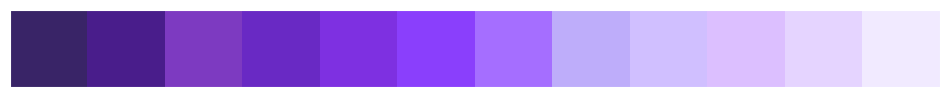

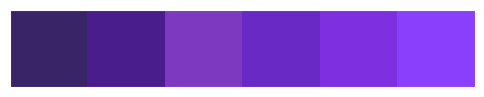

In [2]:
# Custom palette.
palette = ['#392467', '#491D8B', '#7D3AC1', '#6929C4', '#7E30E1', '#8A3FFC', '#A56EFF',
          '#BEADFA', '#D0BFFF', '#DCBFFF', '#E5D4FF', '#F1EAFF']

# Making a shorter version of the same palette.
short_palette = ['#392467', '#491D8B', '#7D3AC1', '#6929C4', '#7E30E1', '#8A3FFC']

sns.palplot(palette)
sns.palplot(short_palette)

## Data Summary

In [3]:
df = pd.read_csv(r"C:\Data Science\Datasets\winequality-red.csv", delimiter=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Renaming columns for convenience.

df = df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid",
                    "residual sugar": "residual_sugar", "free sulfur dioxide": "free_sulfur_dioxide", 
                    "total sulfur dioxide": "total_sulfur_dioxide", "alcohol": "alcohol_percent"})

# Data Analysis

## Collinearity

<Axes: >

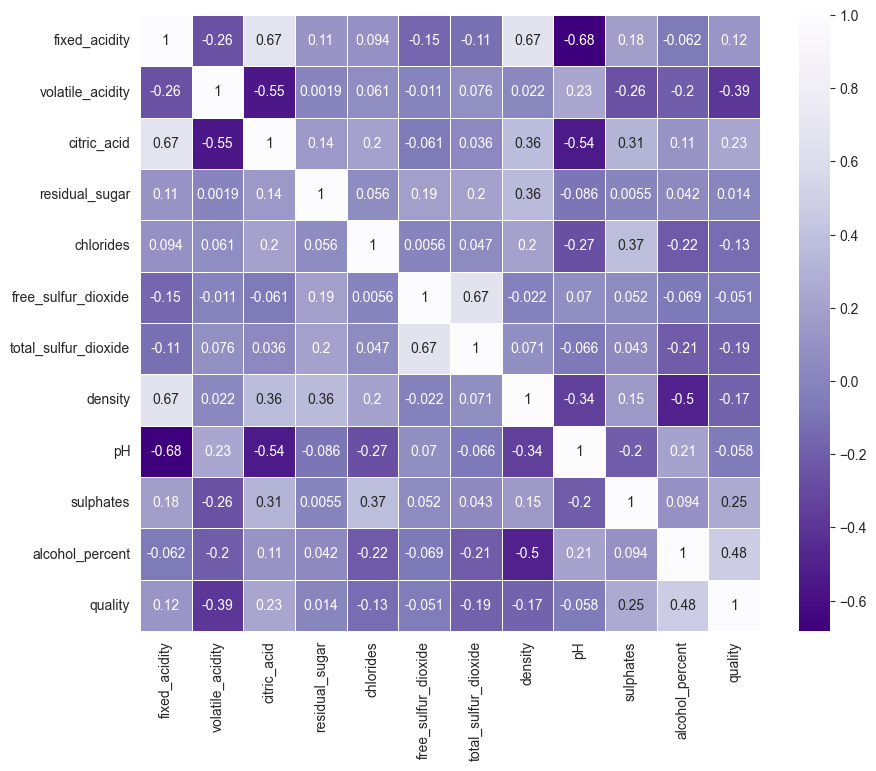

In [8]:
fig, ax = plt.subplots(figsize = (10,8))

sns.heatmap(df.corr(), cmap="Purples_r", annot=True, linewidths=0.5)

<br>

### Correlations among Independent Variables

We can see that there are three correlations greater than 0.50:
- fixed_acidity & citric_acid
- fixed_acidity & density
- free_sulfur_dioxide & total_sulfur_dioxide

And four correlations less than -0.50:
- volatile_acidity & citric_acid
- fixed_acidity & pH
- citric_acid & pH
- density & alcohol_percent

There is evidently a strong collinearity between these independent variable pairs and this should be kept in mind as we go on.

### Correlations for Dependent Variable (Wine Quality)

For the dependent variable, the highest correlations are with 
- alcohol_percent
- sulphates
- citric_acid

The lowest correlations are with 
- volatile_acidity
- total_sulfur_dioxide
- density

<br>

## Distributions

### Distribution of Quality

Text(0, 0.5, 'Frequency')

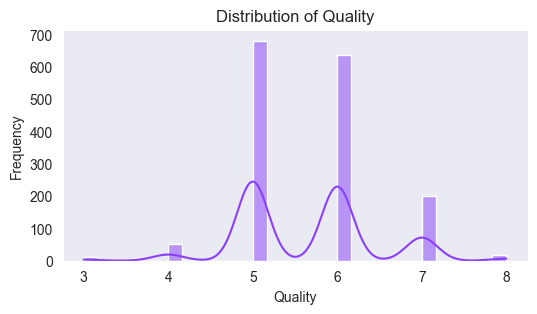

In [9]:
fig, axes = plt.subplots(figsize=(6,3))

sns.histplot(data=df, x="quality", color='#8A3FFC', kde=True)

plt.title("Distribution of Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")

We can see that the dependent variable resembles a Gaussian distribution with twin peaks of 5 and 6. 



### Independent Variables

The independent variables, on the other hand, naturally group themselves into five sets of seemingly Gaussian distributions, with each set appearing increasingly standardized.

### Distribution of First Set

<Axes: xlabel='residual_sugar', ylabel='Count'>

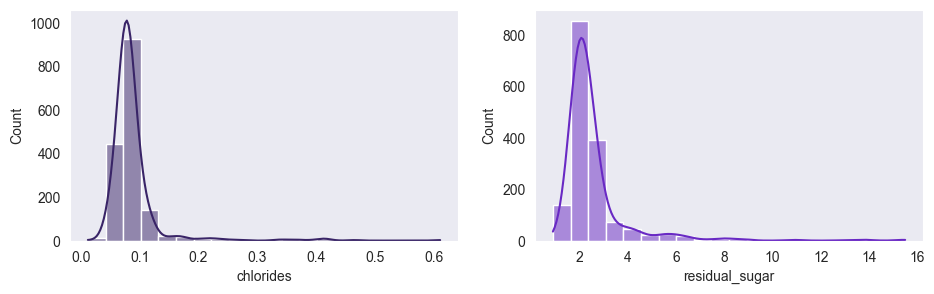

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(11,3))

sns.histplot(data=df, x="chlorides", color='#392467', ax=axes[0], bins=20, kde=True)
sns.histplot(data=df, x="residual_sugar",color='#6929C4', ax=axes[1], bins=20, kde=True)

### Distribution of Second Set

<Axes: xlabel='sulphates', ylabel='Count'>

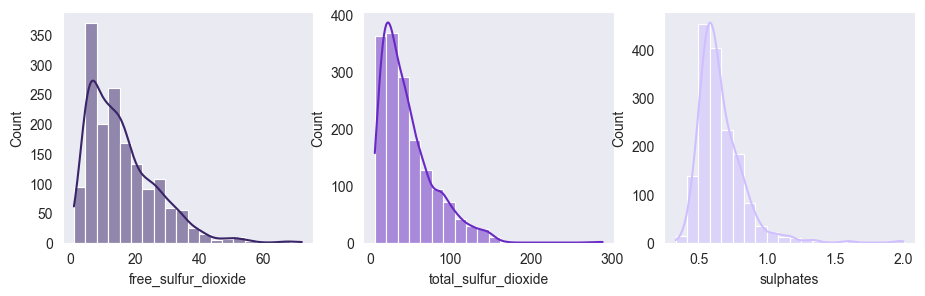

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(11,3))

sns.histplot(data=df, x="free_sulfur_dioxide", color='#392467', ax=axes[0], bins=20, kde=True)
sns.histplot(data=df, x="total_sulfur_dioxide",color='#6929C4', ax=axes[1], bins=20, kde=True)
sns.histplot(data=df, x="sulphates",color='#D0BFFF', ax=axes[2], bins=20, kde=True)

### Distribution of Third Set

<Axes: xlabel='alcohol_percent', ylabel='Count'>

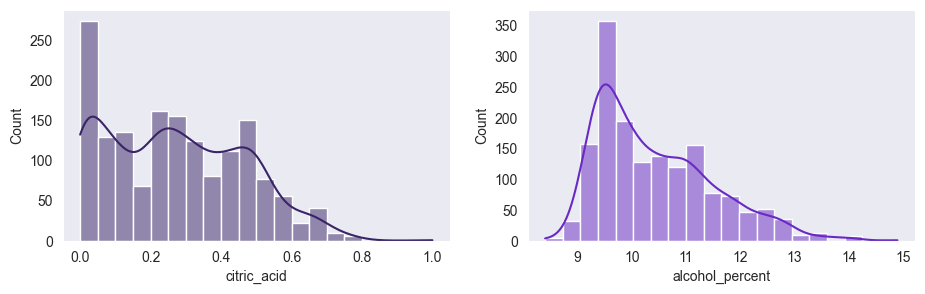

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(11,3))

sns.histplot(data=df, x="citric_acid",color='#392467', ax=axes[0], bins=20, kde=True)
sns.histplot(data=df, x="alcohol_percent", color='#6929C4', ax=axes[1], bins=20, kde=True) 

### Distribution of Fourth Set

<Axes: xlabel='volatile_acidity', ylabel='Count'>

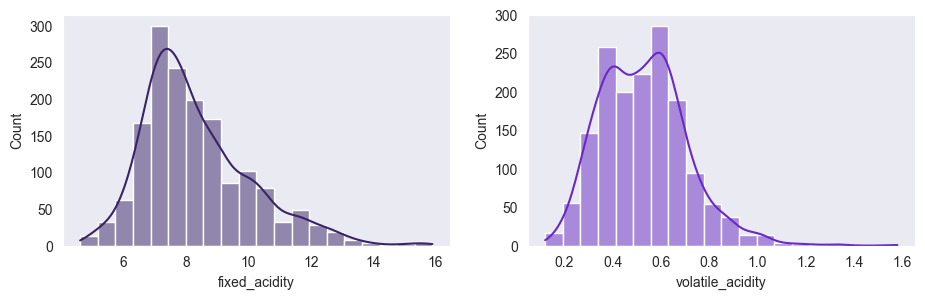

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(11,3))

sns.histplot(data=df, x="fixed_acidity", color='#392467', ax=axes[0], bins=20, kde=True)
sns.histplot(data=df, x="volatile_acidity",color='#6929C4', ax=axes[1], bins=20, kde=True)

### Distribution of Fifth Set

<Axes: xlabel='pH', ylabel='Count'>

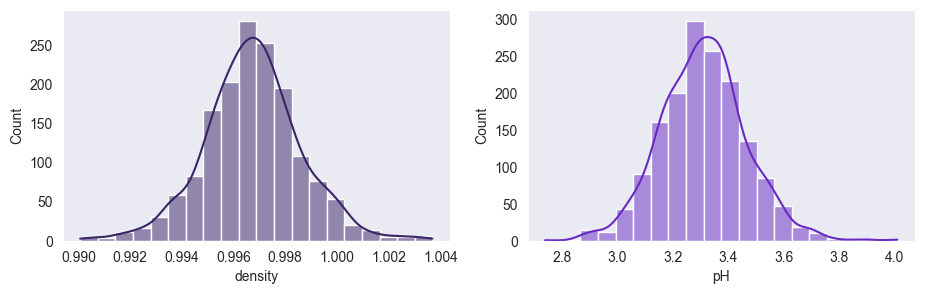

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(11,3))

sns.histplot(data=df, x="density", color='#392467', ax=axes[0], bins=20, kde=True)
sns.histplot(data=df, x="pH",color='#6929C4', ax=axes[1], bins=20, kde=True)

### Comments

As mentioned earlier, we can see that the independent variables fall into five groups with each successive group becoming increasingly standardized:
- First group: chlorides & residual_sugar
- Second group: free_sulfur_dioxide, total_sulfur_dioxide, sulphates
- Third group: alcohol_percent, citric_acid 
- Fourth group: fixed_acidity, volatile_acidity
- Fifth group: density, pH

The quality of the wine (dependent variable) is mostly centered around a mode of 5 or 6.

# Relationships With Dependent Variable (Wine Quality)

Now let us try to visualize the relationship between the quality of the wine with each set of variables. 

### First Set

<Axes: xlabel='residual_sugar', ylabel='quality'>

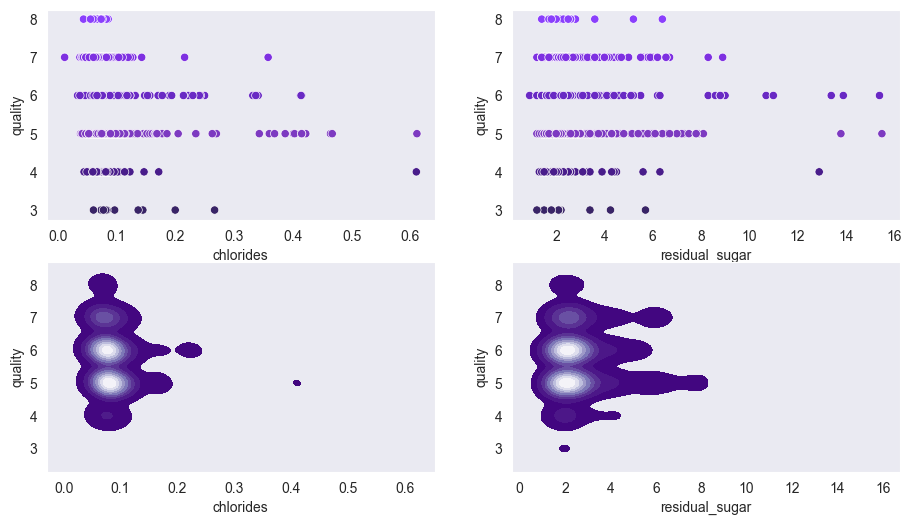

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(11,6))

sns.scatterplot(data=df, x="chlorides", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,0])
sns.scatterplot(data=df, x="residual_sugar", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,1])
sns.kdeplot(data=df, x="chlorides", y="quality", cmap="Purples_r", fill=True, ax=axes[1,0])
sns.kdeplot(data=df, x="residual_sugar", y="quality", cmap="Purples_r", fill=True, ax=axes[1,1])

### Second Set

<Axes: xlabel='sulphates', ylabel='quality'>

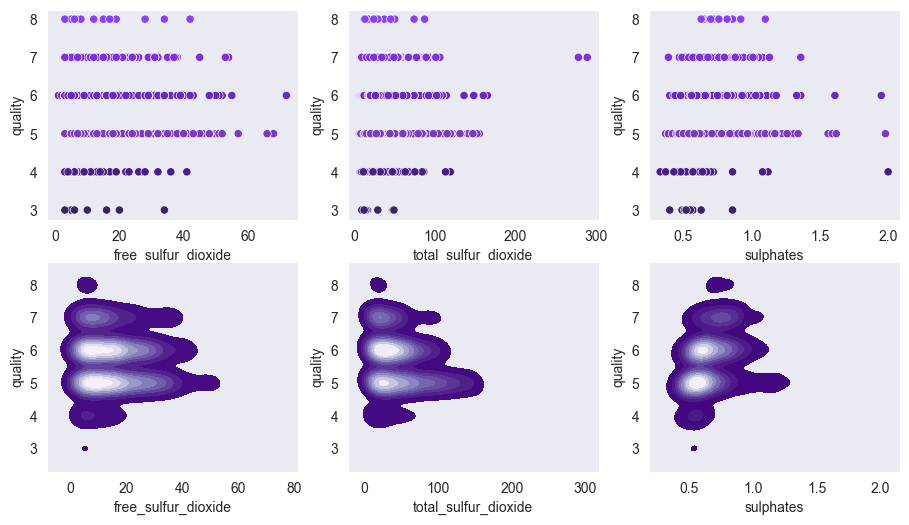

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(11,6))

sns.scatterplot(data=df, x="free_sulfur_dioxide", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,0])
sns.scatterplot(data=df, x="total_sulfur_dioxide", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,1])
sns.scatterplot(data=df, x="sulphates", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,2])
sns.kdeplot(data=df, x="free_sulfur_dioxide", y="quality", cmap="Purples_r", fill=True, ax=axes[1,0])
sns.kdeplot(data=df, x="total_sulfur_dioxide", y="quality", cmap="Purples_r", fill=True, ax=axes[1,1])
sns.kdeplot(data=df, x="sulphates", y="quality", cmap="Purples_r", fill=True, ax=axes[1,2])

### Third Set

<Axes: xlabel='alcohol_percent', ylabel='quality'>

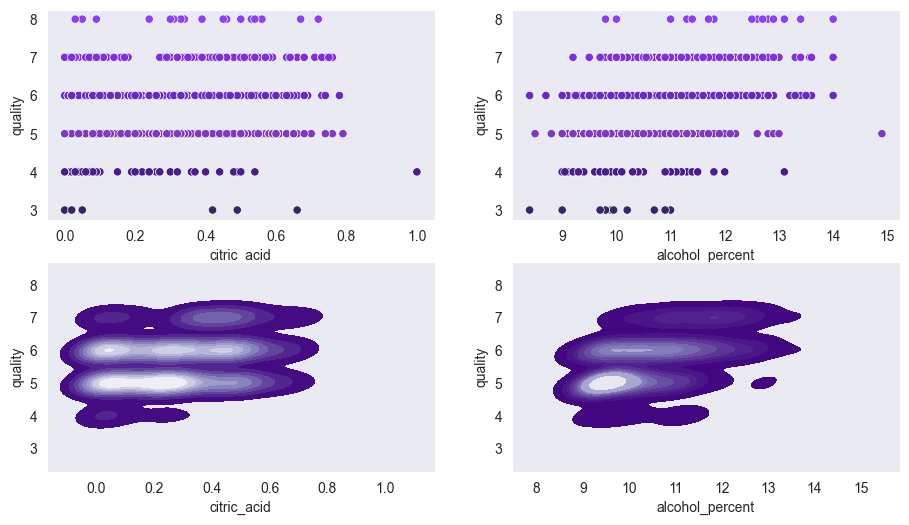

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(11,6))

sns.scatterplot(data=df, x="citric_acid", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,0])
sns.scatterplot(data=df, x="alcohol_percent", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,1])
sns.kdeplot(data=df, x="citric_acid", y="quality", cmap="Purples_r", fill=True, ax=axes[1,0])
sns.kdeplot(data=df, x="alcohol_percent", y="quality", cmap="Purples_r", fill=True, ax=axes[1,1])

### Fourth Set

<Axes: xlabel='volatile_acidity', ylabel='quality'>

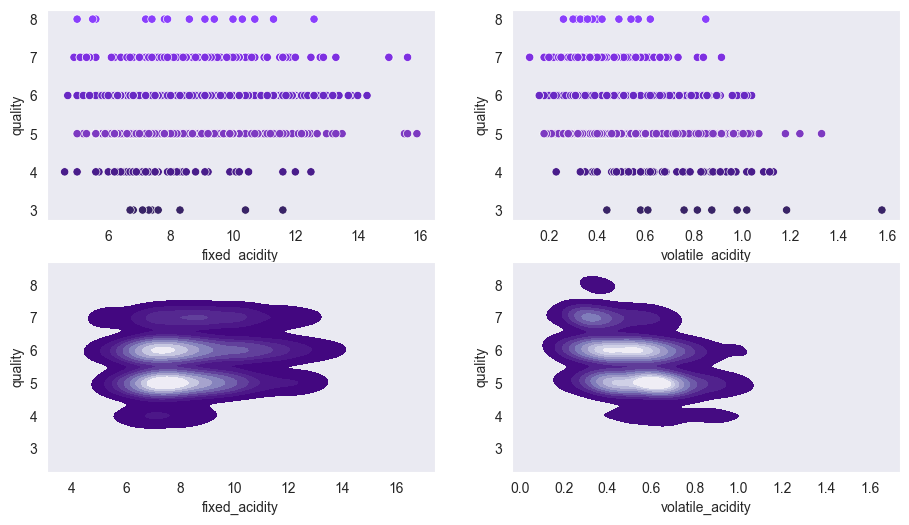

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(11,6))

sns.scatterplot(data=df, x="fixed_acidity", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,0])
sns.scatterplot(data=df, x="volatile_acidity", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,1])
sns.kdeplot(data=df, x="fixed_acidity", y="quality", cmap="Purples_r", fill=True, ax=axes[1,0])
sns.kdeplot(data=df, x="volatile_acidity", y="quality", cmap="Purples_r", fill=True, ax=axes[1,1])

### Fifth Set

<Axes: xlabel='pH', ylabel='quality'>

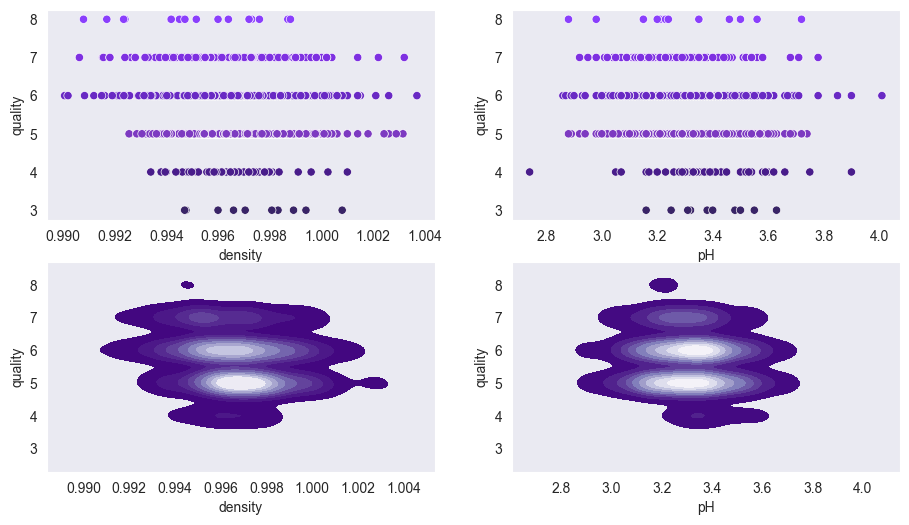

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(11,6))

sns.scatterplot(data=df, x="density", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,0])
sns.scatterplot(data=df, x="pH", y="quality", palette=short_palette, hue="quality", legend=None, ax=axes[0,1])
sns.kdeplot(data=df, x="density", y="quality", cmap="Purples_r", fill=True, ax=axes[1,0])
sns.kdeplot(data=df, x="pH", y="quality", cmap="Purples_r", fill=True, ax=axes[1,1])

### Comments

We can see from the data that the wines with higher ratings (6-8) tend to show visible patterns for the <b>first two sets</b>. Good wines tend to score low on chlorides, residual sugar, free sulfur dioxide, total sulfur dioxide and sulphates. The remaining three sets do not tend to show as significant of a pattern, although highly rated wines do tend to have higher alcohol percentage and lower volatile acidity. 

# Relationships Between Independent Variables (Collinearity)

We saw earlier that there were strong correlations between independent variables. Here we will visualize these correlations more clearly. Most notably, we had strong positive correlations between:
- fixed_acidity & citric_acid
- fixed_acidity & density
- free_sulfur_dioxide & total_sulfur_dioxide

And strong negative correlations between:
- volatile_acidity & citric_acid
- fixed_acidity & pH
- citric_acid & pH
- density & alcohol_percent

<br>

In order to aid our visualization, let's create a separate data frames for low (3, 4, 5) and high (6, 7, 8) quality wines.

In [20]:
df_low = df.loc[df['quality'] <= 5]
df_high = df.loc[df['quality'] > 5]

<Axes: xlabel='fixed_acidity', ylabel='citric_acid'>

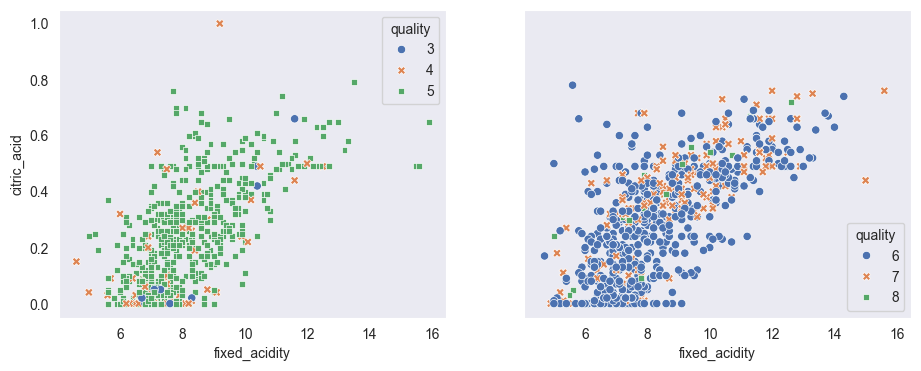

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)


sns.scatterplot(data=df_low, x="fixed_acidity", y="citric_acid", palette="deep", hue="quality", style="quality", 
                ax=axes[0])
sns.scatterplot(data=df_high, x="fixed_acidity", y="citric_acid", palette="deep", hue="quality", style="quality",
                ax=axes[1])

### Comments

Wines with a rating of 7 tend to have conspicuously higher citric acidities.

<br>

<Axes: xlabel='fixed_acidity', ylabel='density'>

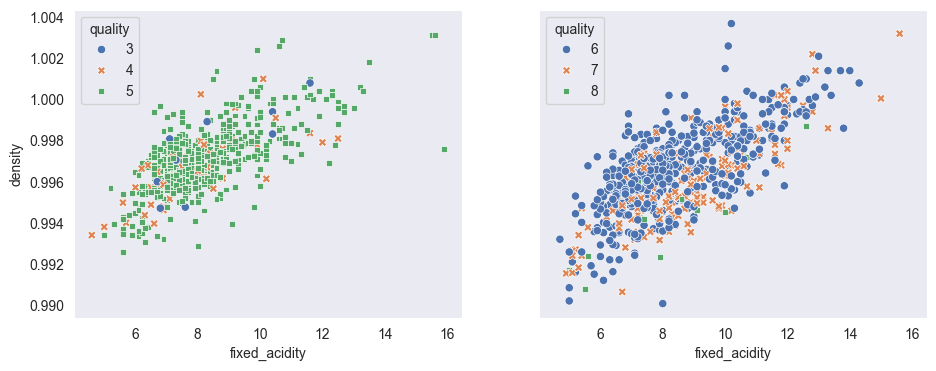

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)

sns.scatterplot(data=df_low, x="fixed_acidity", y="density", palette="deep", hue="quality", style="quality",
                ax=axes[0])
sns.scatterplot(data=df_high, x="fixed_acidity", y="density", palette="deep", hue="quality", style="quality",
                ax=axes[1])

<Axes: xlabel='free_sulfur_dioxide', ylabel='total_sulfur_dioxide'>

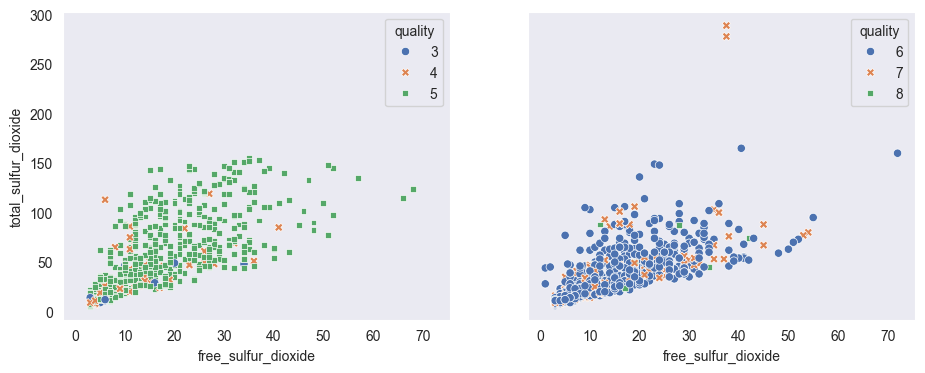

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)


sns.scatterplot(data=df_low, x="free_sulfur_dioxide", y="total_sulfur_dioxide", palette="deep", style="quality",
                hue="quality", ax = axes[0], legend=True)
sns.scatterplot(data=df_high, x="free_sulfur_dioxide", y="total_sulfur_dioxide", palette="deep", style="quality",
                hue="quality", ax = axes[1], legend=True)

<Axes: xlabel='volatile_acidity', ylabel='citric_acid'>

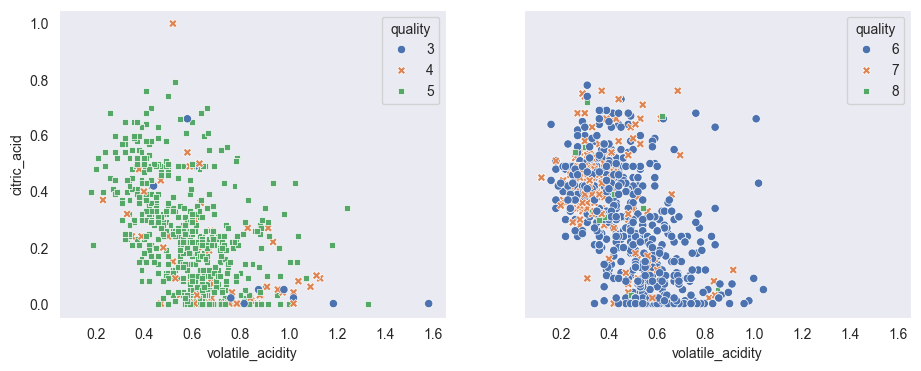

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)


sns.scatterplot(data=df_low, x="volatile_acidity", y="citric_acid", palette="deep", style="quality",
                hue="quality", ax = axes[0], legend=True)
sns.scatterplot(data=df_high, x="volatile_acidity", y="citric_acid", palette="deep", style="quality",
                hue="quality", ax = axes[1], legend=True)

### Comments

As mentioned earlier, highly rated wines have lower volatile acidity. We can see the wines rated 7 and 8 hovering near the left of the second graph.

<br>

<Axes: xlabel='pH', ylabel='fixed_acidity'>

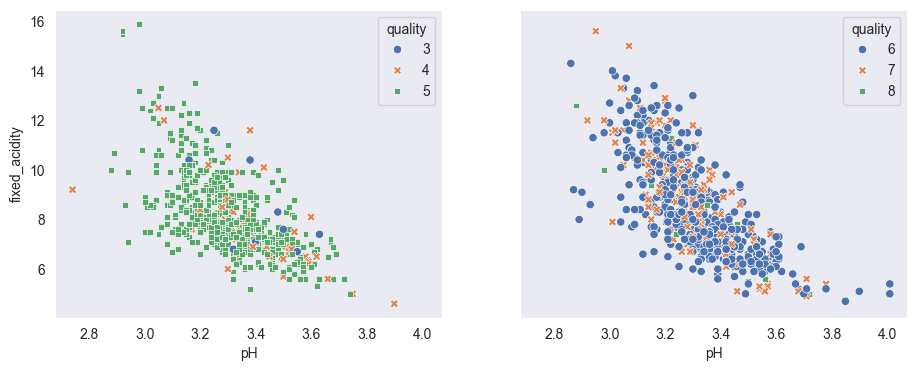

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)


sns.scatterplot(data=df_low, x="pH", y="fixed_acidity", palette="deep", style="quality",
                hue="quality", legend=True, ax=axes[0])
sns.scatterplot(data=df_high, x="pH", y="fixed_acidity", palette="deep", style="quality",
                hue="quality", legend=True, ax=axes[1])

<Axes: xlabel='pH', ylabel='citric_acid'>

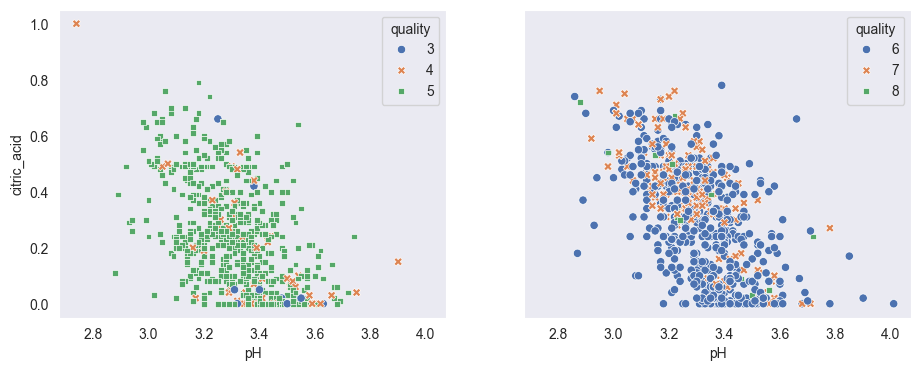

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)

sns.scatterplot(data=df_low, x="pH", y="citric_acid", palette="deep", style="quality",
                hue="quality", legend=True, ax=axes[0])
sns.scatterplot(data=df_high, x="pH", y="citric_acid", palette="deep", style="quality",
                hue="quality", legend=True, ax=axes[1])

<Axes: xlabel='alcohol_percent', ylabel='density'>

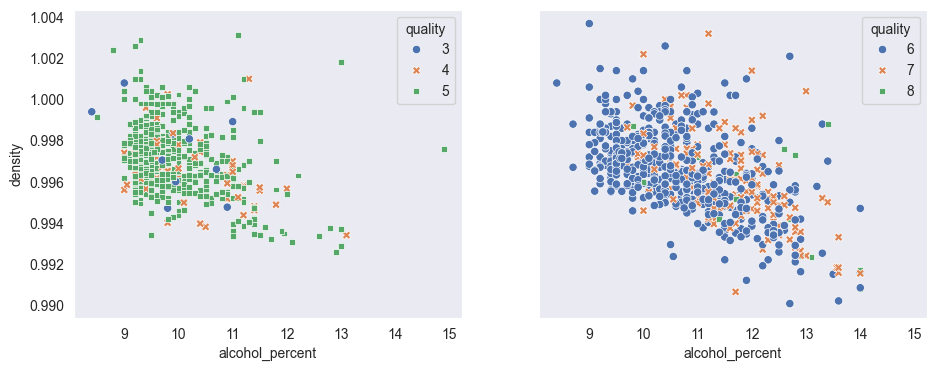

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(11,4), sharex = True, sharey = True)

sns.scatterplot(data=df_low, x="alcohol_percent", y="density", palette="deep", style="quality",
                hue="quality", ax = axes[0], legend=True)
sns.scatterplot(data=df_high, x="alcohol_percent", y="density", palette="deep", style="quality",
                hue="quality", ax = axes[1], legend=True)

### Comments

The density-alcohol percent interaction shows that highly rated wines are more likely to have higher alcohol percent. This is particularly notable in the rightwards shift for wines rated 7 and 8 compared to wines rated 6.

In conclusion, four of the collinear pairs have little to no differences between wine quality. There are three exceptions:
- citric acid-fixed acidity, where wines rated 7 tend to have higher citric acidity
- citric acid-volatile acidity, where wines rated 7-8 tend to have lower volatile acidity
- density-alcohol percent, where wines rated 6-8 tend to have higher alcohol percent

There are otherwise no discernible differences between wine quality for the collinear pairs. It seems that the variables for predicting wine quality are not very distinguishable as the quality changes. It possibly suggests a high degree of subjectivity for the wine ratings.

# Modelling the Data using Machine Learning

We will try three kinds of machine learning models here to see if we can predict the wine quality with our current dataset: k-nearest neighbors, decision trees and ensemble methods.

## K-Nearest Neighbors

In [28]:
# Creating train/test splits.

y = df["quality"]
X = df.drop("quality", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [5 3 7 6 5 6 6 6 6 6 5 5 5 6 4 6 7 6 5 5 6 6 6 5 3 5 6 6 5 6 7 4 6 5 7 5 5
 5 6 6 5 7 6 5 6 6 5 6 5 6 6 5 4 6 5 5 5 6 7 5 5 6 6 5 5 5 5 5 8 7 5 5 6 5
 6 6 5 5 5 6 6 5 4 6 5 5 5 5 6 5 5 4 5 5 5 5 5 6 6 5 7 5 4 6 6 6 6 7 5 5 6
 5 6 6 6 7 5 7 6 6 5 7 4 5 7 5 5 5 5 5 5 5 4 5 6 5 6 5 6 5 6 6 5 5 5 6 6 7
 5 6 6 5 7 6 6 6 5 6 6 6 6 6 5 6 6 5 6 5 6 5 5 3 6 7 7 6 5 7 6 5 5 6 6 4 6
 5 6 4 5 6 5 5 5 5 5 5 5 5 5 5 6 6 6 6 5 5 6 6 6 6 5 5 5 5 5 5 5 6 5 5 5 5
 7 4 5 5 6 5 5 4 5 6 4 7 7 6 5 6 7 7 5 5 6 6 4 5 5 5 5 5 4 5 5 6 5 5 5 6 5
 6 5 6 5 5 4 5 6 5 6 5 5 5 6 5 6 6 5 6 6 7 6 6 5 5 5 5 5 5 6 6 5 5 6 5 5 6
 5 5 5 6 6 3 5 5 5 6 5 5 6 5 5 6 5 6 6 7 5 6 5 7 5 5 4 7 7 7 6 5 5 5 6 5 4
 6 5 5 6 6 6 6 5 6 5 5 6 5 6 5 5 6 5 6 5 7 6 5 5 6 6 8 5 5 5 5 6 6 5 6 5 5
 6 7 5 6 5 5 5 6 6 5 6 5 6 6 5 6 5 5 6 5 6 5 5 6 6 6 5 5 6 5]


In [31]:
# Observing accuracies.

print("Training set accuracy: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf.score(X_test, y_test)))

Training set accuracy: 0.745
Test set accuracy: 0.480


We can see that the test set accuracy is quite poor. Let us try to visualize the change in accuracy as the value of n_neighbors changes.

<br>

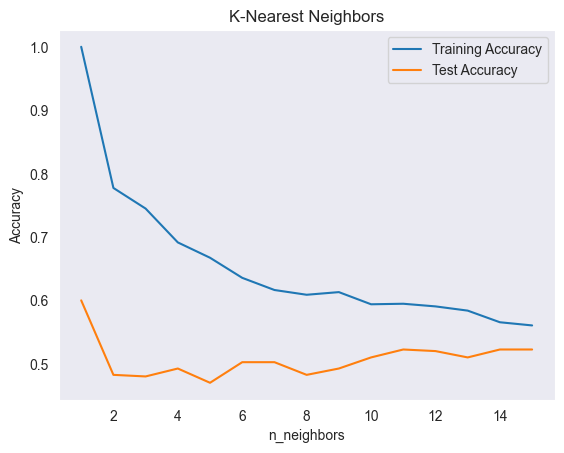

In [32]:
# Graphing the accuracies according to the number of neighbors.

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    # Building the model.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording accuracy.
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.title("K-Nearest Neighbors")
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The data does not seem to fare very well with knn classification. For simple models with just a few neighbors, the test accuracy is quite poor and often below 0.50. As model complexity increases, the training score plummets. 

Let's try scaling the data and see if our test scores change.

## Data Scaling

The data is all positioned in the first quadrant (both x and y values are positive). It would be wise to try two different methods of scaling the data: min-max scaling and standard scaling.

Standard scaling would be useful as we have seen that the wine quality distribution roughly fits a Gaussian model. Standard scaling would adjust it to fit a mean of 0 and a variance of 1, thereby bringing all the data to the range of a fixed magnitude.

The min-max scaling will squeeze all the values in a squared area of [0,1]. This ensures that any variance is captured within fixed limits. We do not have cause to concern ourselves with any disruption from outliers as there are none. 

### Min-Max Scaling

In [33]:
# Scaling everything to fit between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [34]:
X_train_scaled = scaler.transform(X_train)

print("Transformed shape: {}".format(X_train_scaled.shape))
print("Per-feature min before scaling: \n {}".format(X_train.min(axis=0)))
print("Per-feature max before scaling: \n {}".format(X_train.max(axis=0)))

Transformed shape: (1199, 11)
Per-feature min before scaling: 
 fixed_acidity           4.70000
volatile_acidity        0.12000
citric_acid             0.00000
residual_sugar          0.90000
chlorides               0.01200
free_sulfur_dioxide     1.00000
total_sulfur_dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.37000
alcohol_percent         8.40000
dtype: float64
Per-feature max before scaling: 
 fixed_acidity            15.90000
volatile_acidity          1.58000
citric_acid               1.00000
residual_sugar           15.50000
chlorides                 0.61100
free_sulfur_dioxide      72.00000
total_sulfur_dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol_percent          14.90000
dtype: float64


In [35]:
print("Per-feature min after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("Per-feature max after scaling: \n {}".format(X_train_scaled.max(axis=0)))

Per-feature min after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Per-feature max after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
X_test_scaled = scaler.transform(X_test)

print("Per-feature min after scaling: \n {}".format(X_test_scaled.min(axis=0)))
print("Per-feature max after scaling: \n {}".format(X_test_scaled.max(axis=0)))

Per-feature min after scaling: 
 [-0.00892857  0.02739726  0.          0.02739726  0.03672788  0.
  0.          0.00954479  0.11023622 -0.02453988  0.        ]
Per-feature max after scaling: 
 [0.97321429 0.63013699 0.79       0.82191781 0.68447412 0.71830986
 0.56183746 0.96402349 0.91338583 0.59509202 0.86153846]


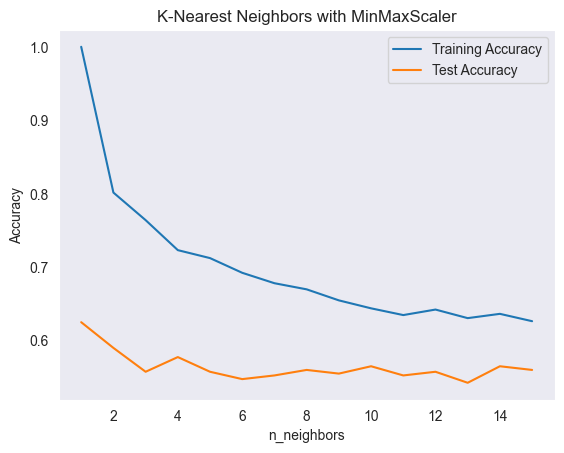

In [37]:
# Mapping out the accuracies across a variety of values for k.

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    # Building the model.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train_scaled, y_train)
    
    # Recording accuracy.
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.title("K-Nearest Neighbors with MinMaxScaler")
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [38]:
# Printing the training accuracies.

formatted_training_accuracy = [ '%.3f' % elem for elem in training_accuracy]
print(formatted_training_accuracy)

['1.000', '0.802', '0.764', '0.723', '0.712', '0.692', '0.678', '0.670', '0.655', '0.644', '0.635', '0.642', '0.631', '0.636', '0.626']


In [39]:
# Printing the test accuracies.

formatted_test_accuracy = [ '%.3f' % elem for elem in test_accuracy]
print(formatted_test_accuracy)

['0.625', '0.590', '0.557', '0.578', '0.557', '0.547', '0.552', '0.560', '0.555', '0.565', '0.552', '0.557', '0.542', '0.565', '0.560']


Even after scaling, the KNN classifier does not yield a particularly impressive model. The range of test accuracies tend to hover between 0.50 - 0.60 whereas training accuracy falls to nearly 0.60.

Let us set the final model at k = 4 to avoid overfitting.

In [40]:
# Final model of k-nearest neighbors with min-max scaling.

clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(clf.score(X_test_scaled, y_test)))

Training set accuracy: 0.723
Test set accuracy: 0.578


### Standard Scaling.

In [41]:
# Scaling everything to fit a mean of 0 and a variance of 1.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train_scaled = scaler.transform(X_train)

print("Transformed shape: {}".format(X_train_scaled.shape))
print("Per-feature min before scaling: \n {}".format(X_train.min(axis=0)))
print("Per-feature max before scaling: \n {}".format(X_train.max(axis=0)))

Transformed shape: (1199, 11)
Per-feature min before scaling: 
 fixed_acidity           4.70000
volatile_acidity        0.12000
citric_acid             0.00000
residual_sugar          0.90000
chlorides               0.01200
free_sulfur_dioxide     1.00000
total_sulfur_dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.37000
alcohol_percent         8.40000
dtype: float64
Per-feature max before scaling: 
 fixed_acidity            15.90000
volatile_acidity          1.58000
citric_acid               1.00000
residual_sugar           15.50000
chlorides                 0.61100
free_sulfur_dioxide      72.00000
total_sulfur_dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol_percent          14.90000
dtype: float64


In [43]:
print("Per-feature min after scaling: \n {}".format(X_train_scaled.min(axis=0)))
print("Per-feature max after scaling: \n {}".format(X_train_scaled.max(axis=0)))

Per-feature min after scaling: 
 [-2.09594079 -2.23757495 -1.39354657 -1.12230039 -1.56349061 -1.42600851
 -1.21739582 -3.55710843 -3.68812335 -1.63314637 -1.88316295]
Per-feature max after scaling: 
 [ 4.35659696  5.72284504  3.74804293  8.76114727 10.88593142  5.26461531
  7.11005298  3.68752657  4.54553849  7.58576722  4.2190492 ]


In [44]:
X_test_scaled = scaler.transform(X_test)

print("Per-feature min after scaling: \n {}".format(X_test_scaled.min(axis=0)))
print("Per-feature max after scaling: \n {}".format(X_test_scaled.max(axis=0)))

Per-feature min after scaling: 
 [-2.15355273 -2.01948125 -1.39354657 -0.851521   -1.10624973 -1.42600851
 -1.21739582 -3.48795993 -2.78047558 -1.85937737 -1.88316295]
Per-feature max after scaling: 
 [4.18376113 2.77858011 2.66830914 7.00108125 6.95781662 3.37993255
 3.46127683 3.42688993 3.83238667 3.85295559 3.37412752]


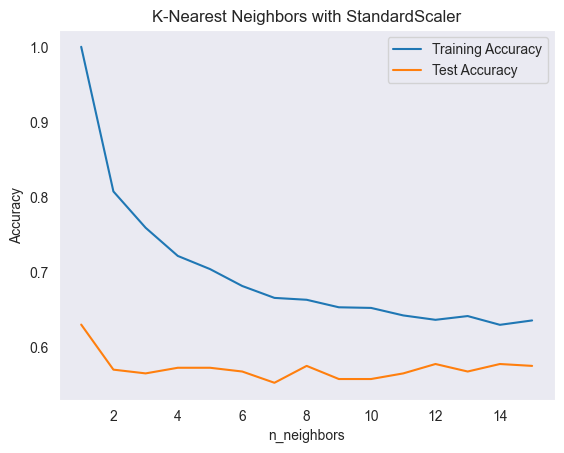

In [45]:
# Mapping out the accuracies across a variety of values for k.

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    # Building the model.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train_scaled, y_train)
    
    # Recording accuracy.
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.title("K-Nearest Neighbors with StandardScaler")
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [46]:
# Printing the training accuracies.

formatted_training_accuracy = [ '%.3f' % elem for elem in training_accuracy]
print(formatted_training_accuracy)

['1.000', '0.807', '0.759', '0.721', '0.704', '0.681', '0.666', '0.663', '0.653', '0.652', '0.642', '0.636', '0.641', '0.630', '0.636']


In [47]:
# Printing the test accuracies.

formatted_test_accuracy = [ '%.3f' % elem for elem in test_accuracy]
print(formatted_test_accuracy)

['0.630', '0.570', '0.565', '0.573', '0.573', '0.568', '0.552', '0.575', '0.557', '0.557', '0.565', '0.578', '0.568', '0.578', '0.575']


<br>

With standard scaling, the max test-scores exist at k=1 and k=4. Given that k=1 is obviously an overfitting, and k=4 returns a training score of 0.726, it would seem that this value is ideal. This would yield training/test scores which are both higher than the values acquired with min-max scaling.

Let us set k=4 as the best model for KNN with standard scaling.

In [48]:
# Final model of k-nearest neighbors with standard scaling.

clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(clf.score(X_test_scaled, y_test)))

Training set accuracy: 0.721
Test set accuracy: 0.573


## Decision Trees

In [49]:
# Creating train/test splits.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.632


In [51]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.06147129 0.11309874 0.02823654 0.06431179 0.08117864 0.06485627
 0.1159854  0.09921415 0.06627694 0.11543534 0.18993489]


<br>

We haven't done any pre-pruning, hence the 100% training score and the full use of every feature. The test score is only 63% but that is also a better return than both the linear regression and the knn models. 

Let's re-make the tree with depth intervals.

<br>

### Decision Trees with Pre-Pruning

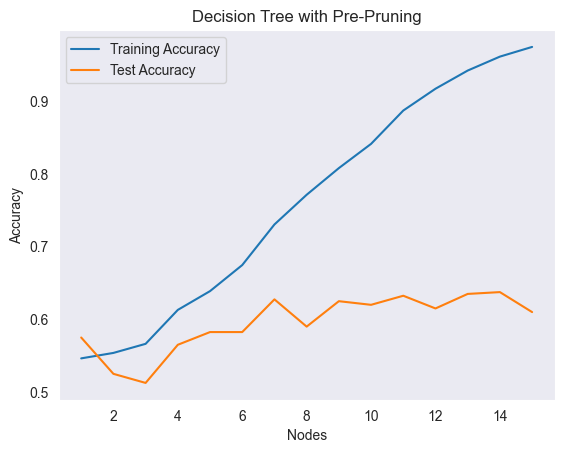

In [52]:
# Mapping out the accuracies across a variety of nodes.

training_accuracy = []
test_accuracy = []
node_settings = range(1,16)

for nodes in node_settings:
    # Building the model.
    tree01 = DecisionTreeClassifier(max_depth = nodes, random_state = 0)
    tree01.fit(X_train, y_train)
    
    # Recording accuracy.
    training_accuracy.append(tree01.score(X_train, y_train))
    test_accuracy.append(tree01.score(X_test, y_test))
    
plt.title("Decision Tree with Pre-Pruning")
plt.plot(node_settings, training_accuracy, label="Training Accuracy")
plt.plot(node_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Nodes")
plt.legend()

It appears that a depth of 7 nodes will likely yield the best test score without taking the risk of overfitting the model.

<br>

In [53]:
# Final model with a depth of 7 nodes

tree02 = DecisionTreeClassifier(max_depth = 7, random_state = 0)
tree02.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree02.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree02.score(X_test, y_test)))

Accuracy on training set: 0.731
Accuracy on test set: 0.627


In [54]:
# Importance of each feature.

print("Feature importances:\n{}".format(tree02.feature_importances_))

Feature importances:
[0.02617155 0.11448818 0.02480574 0.0434072  0.04562187 0.02479017
 0.1275266  0.12303188 0.06042183 0.10850494 0.30123004]


### Comments

As we can see, the training score increases quite rapidly with the number of nodes. The test score falls from 1-3, but then steadily rises until nodes = 7, before staying relatively constant. Given the persistent rise of the training score with the increase of tree depth, it's probably best to stop at  7 nodes before we risk over-fitting the data.

## Ensemble Methods

### Random Forest Regressor

In [55]:
# Creating the train/test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

forest01 = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest01.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
print("Accuracy on training set: {:.3f}".format(forest01.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest01.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.700


<br>

With a hundred estimators, we'll be overfitting the data, but the test score certainly looks more appealing than the previous score with Decision Trees. 

Let's visualize the test and training scores across a range of estimators.

<br>

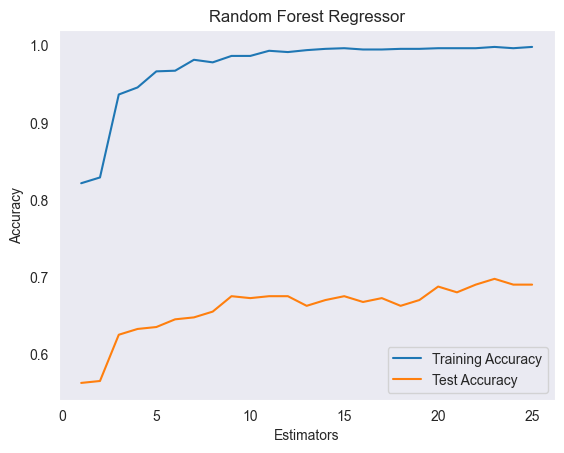

In [57]:
# Mapping out the accuracies across a range of estimators.

training_accuracy = []
test_accuracy = []
estimators = range(1,26)

for n in estimators:
    # Building the model.
    forest02 = RandomForestClassifier(n_estimators = n, random_state = 0)
    forest02.fit(X_train, y_train)
    
    # Recording accuracy.
    training_accuracy.append(forest02.score(X_train, y_train))
    test_accuracy.append(forest02.score(X_test, y_test))
    
plt.title("Random Forest Regressor")
plt.plot(estimators, training_accuracy, label="Training Accuracy")
plt.plot(estimators, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Estimators")
plt.legend()

We can see that there is an initial peak around n = 9 before the values plateau. A second peak is reached around n = 20, but the training score has risen a bit too close to 100%. It might be best to choose n = 9 as our model to avoid overfitting.

In [58]:
# Final model with 9 estimators.

forest03 = RandomForestClassifier(n_estimators = 9, random_state = 0)
forest03.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest03.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest03.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.675


### Comments

The test accuracy of 0.675 is better than what we had collected from Decision Trees (0.627) and K-Nearest Neighbors (0.600). Furthermore, the training accuracy of 0.987 is far superior to the other two models, which likely suggests that this test score is as high as we might be able to record with supervised learning.


# Conclusion

In conclusion, the quality of wines was looked at with 11 independent variables. Wine quality has notable positive correlations with alcohol percent, sulphates and citric acid; it has notable negative correlations with volatile acidity, total sulfur dioxide and density. Seven pairs of variables appear to have some collinearity, of which three pairs are had different patterns for high- and low-quality wine. 

In order to build supervised machine learning models, three variations were explored: K-Nearest Neighbors, Decision Trees and Random Forest. Of the three, the Random Forest was found to have the best combination of test score (0.675) and training score (0.987).